In [1]:
#https://github.com/pomber/covid19
import numpy as np
import pandas as pd
import json, requests

import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df['date'] = df['date'].astype('datetime64[ns]')

today = df.date.max().date()
tomorrow = today + datetime.timedelta(days=1)
yesterday = today - datetime.timedelta(days=1)
qtdeMonitored = 5
df.tail()

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recoveries_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_cases_million,avg7_deaths_million,avg7_recoveries_million,perc_death,perc_recovery,active_cases
12246,Tajikistan,2020-05-04,230,3,0,5,102.0,1,0,96.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.30,0.0,227
12247,Tajikistan,2020-05-05,293,5,0,6,63.0,2,0,-38.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.71,0.0,288
12248,Tajikistan,2020-05-06,379,8,0,7,86.0,3,0,36.51,...,0.0,54.0,1.0,0.0,5.0,0.0,0.0,2.11,0.0,371
12249,Tajikistan,2020-05-07,461,12,0,8,82.0,4,0,-4.65,...,0.0,63.0,1.0,0.0,6.0,0.0,0.0,2.60,0.0,449
12250,Tajikistan,2020-05-08,522,12,0,9,61.0,0,0,-25.61,...,0.0,72.0,1.0,0.0,7.0,0.0,0.0,2.30,0.0,510


In [3]:
countries = df['country'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

----------------------------
### World - Analysis and monitoring

#### Top 5 deadliest countries + Brazil

In [4]:
cols = ['country','day','date','cases','case_day','deaths','death_day', 'perc_death', 'cases_million',  'deaths_million', 'avg7_cases_million', 'avg7_deaths_million', 'avg7_recoveries_million']
df_top_deaths = df[df['date']==str(today)].sort_values('avg7_deaths_million', ascending = False)

df_top_deaths.reset_index(0, inplace=True)
df_top_deaths.index = df_top_deaths.index + 1
df_top_deaths = df_top_deaths[cols].head(qtdeMonitored).append(df_top_deaths[df_top_deaths['country']=='Brazil'][cols])
df_top_deaths

,country,day,date,cases,case_day,deaths,death_day,perc_death,cases_million,deaths_million,avg7_cases_million,avg7_deaths_million,avg7_recoveries_million
1,Belgium,95,2020-05-08,52011,591.0,8521,106,16.38,51.2,9.2,36.0,10.0,16.0
2,Andorra,68,2020-05-08,752,0.0,47,0,6.25,0.0,0.0,12.0,7.0,127.0
3,Sweden,99,2020-05-08,25265,642.0,3175,135,12.57,64.0,13.5,53.0,7.0,56.0
4,United Kingdom,99,2020-05-08,212629,4652.0,31316,627,14.73,68.9,9.3,71.0,7.0,0.0
5,Spain,98,2020-05-08,222857,1410.0,26299,229,11.80,30.2,4.9,28.0,5.0,58.0
15,Brazil,73,2020-05-08,146894,11121.0,10017,827,6.82,52.7,3.9,37.0,2.0,14.0


#### Top 5 most transmissible countries + Brazil

In [5]:
df_top_cases = df[df['date']==str(today)].sort_values('avg7_cases_million', ascending = False)

df_top_cases.reset_index(0, inplace=True)
df_top_cases.index = df_top_cases.index + 1
df_top_cases = df_top_cases[cols].head(qtdeMonitored).append(df_top_cases[df_top_cases['country']=='Brazil'][cols])
df_top_cases

,country,day,date,cases,case_day,deaths,death_day,perc_death,cases_million,deaths_million,avg7_cases_million,avg7_deaths_million,avg7_recoveries_million
1,Qatar,70,2020-05-08,20201,1311.0,12,0,0.06,462.9,0.0,307.0,0.0,47.0
2,San Marino,72,2020-05-08,623,1.0,41,0,6.58,29.5,0.0,181.0,0.0,134.0
3,Sao Tome and Principe,33,2020-05-08,208,21.0,5,1,2.40,97.7,4.7,127.0,2.0,0.0
4,Singapore,107,2020-05-08,21707,768.0,20,0,0.09,132.3,0.0,113.0,0.0,18.0
5,Bahrain,75,2020-05-08,4444,245.0,8,0,0.18,149.3,0.0,110.0,0.0,41.0
19,Brazil,73,2020-05-08,146894,11121.0,10017,827,6.82,52.7,3.9,37.0,2.0,14.0


#### Countries to be analised

In [6]:
#inform the countries you want to analise
monitoredCountries = ['Brazil','Italy', 'United Kingdom', 'Spain', 'US', 'France', 'Belgium',]

#### Cases and deaths 

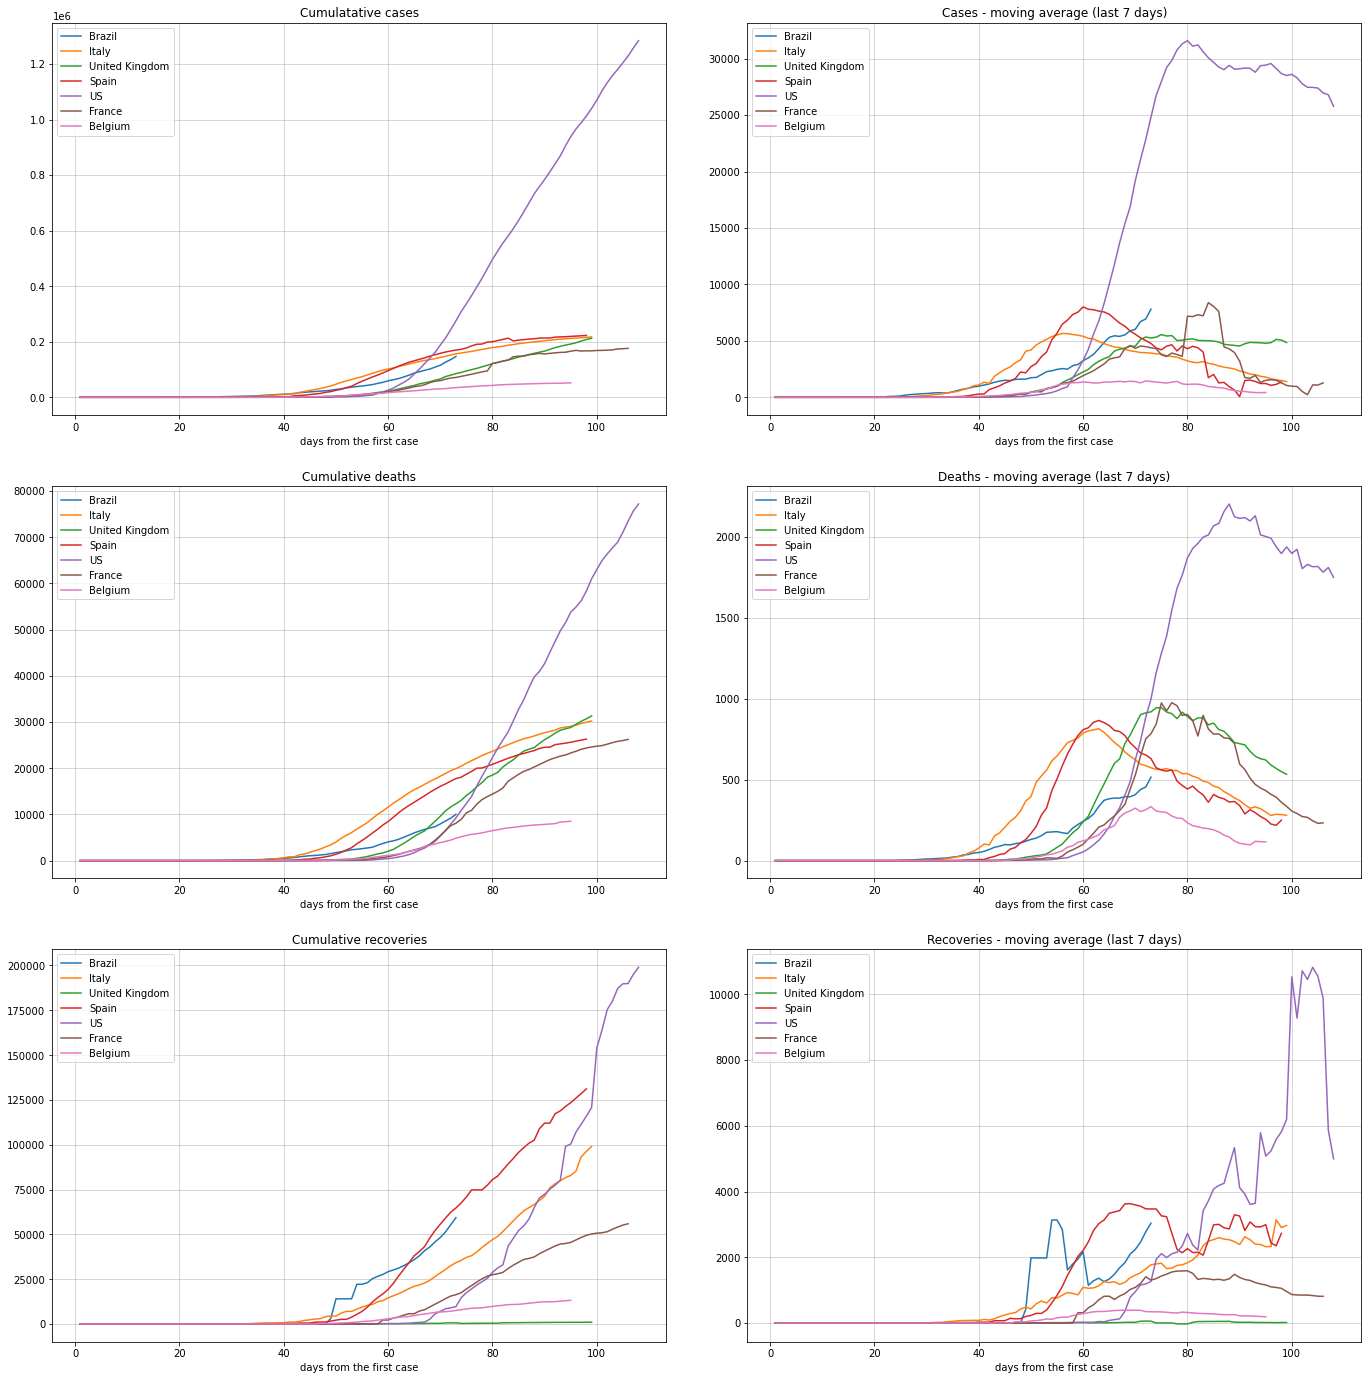

In [7]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cases - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

ax3.set_title("Cumulative deaths")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("Deaths - moving average (last 7 days)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

ax5.set_title("Cumulative recoveries")
ax5.set_xlabel("days from the first case")
ax5.grid(color='gray', alpha = 0.4)

ax6.set_title("Recoveries - moving average (last 7 days)")
ax6.set_xlabel("days from the first case")
ax6.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    ax1.plot(df[df['country'] == country].day, df[df['country'] == country].cases, label = country)
    ax2.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_cases, label = country)
    ax3.plot(df[df['country'] == country].day, df[df['country'] == country].deaths, label = country)
    ax4.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_deaths, label = country)
    ax5.plot(df[df['country'] == country].day, df[df['country'] == country].recoveries, label = country)
    ax6.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_recoveries, label = country)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
fig.savefig('../analysis/world_cases_deaths.png')

#### Cases, deaths and recoveries per million 
(million of population - normalizes per country population)

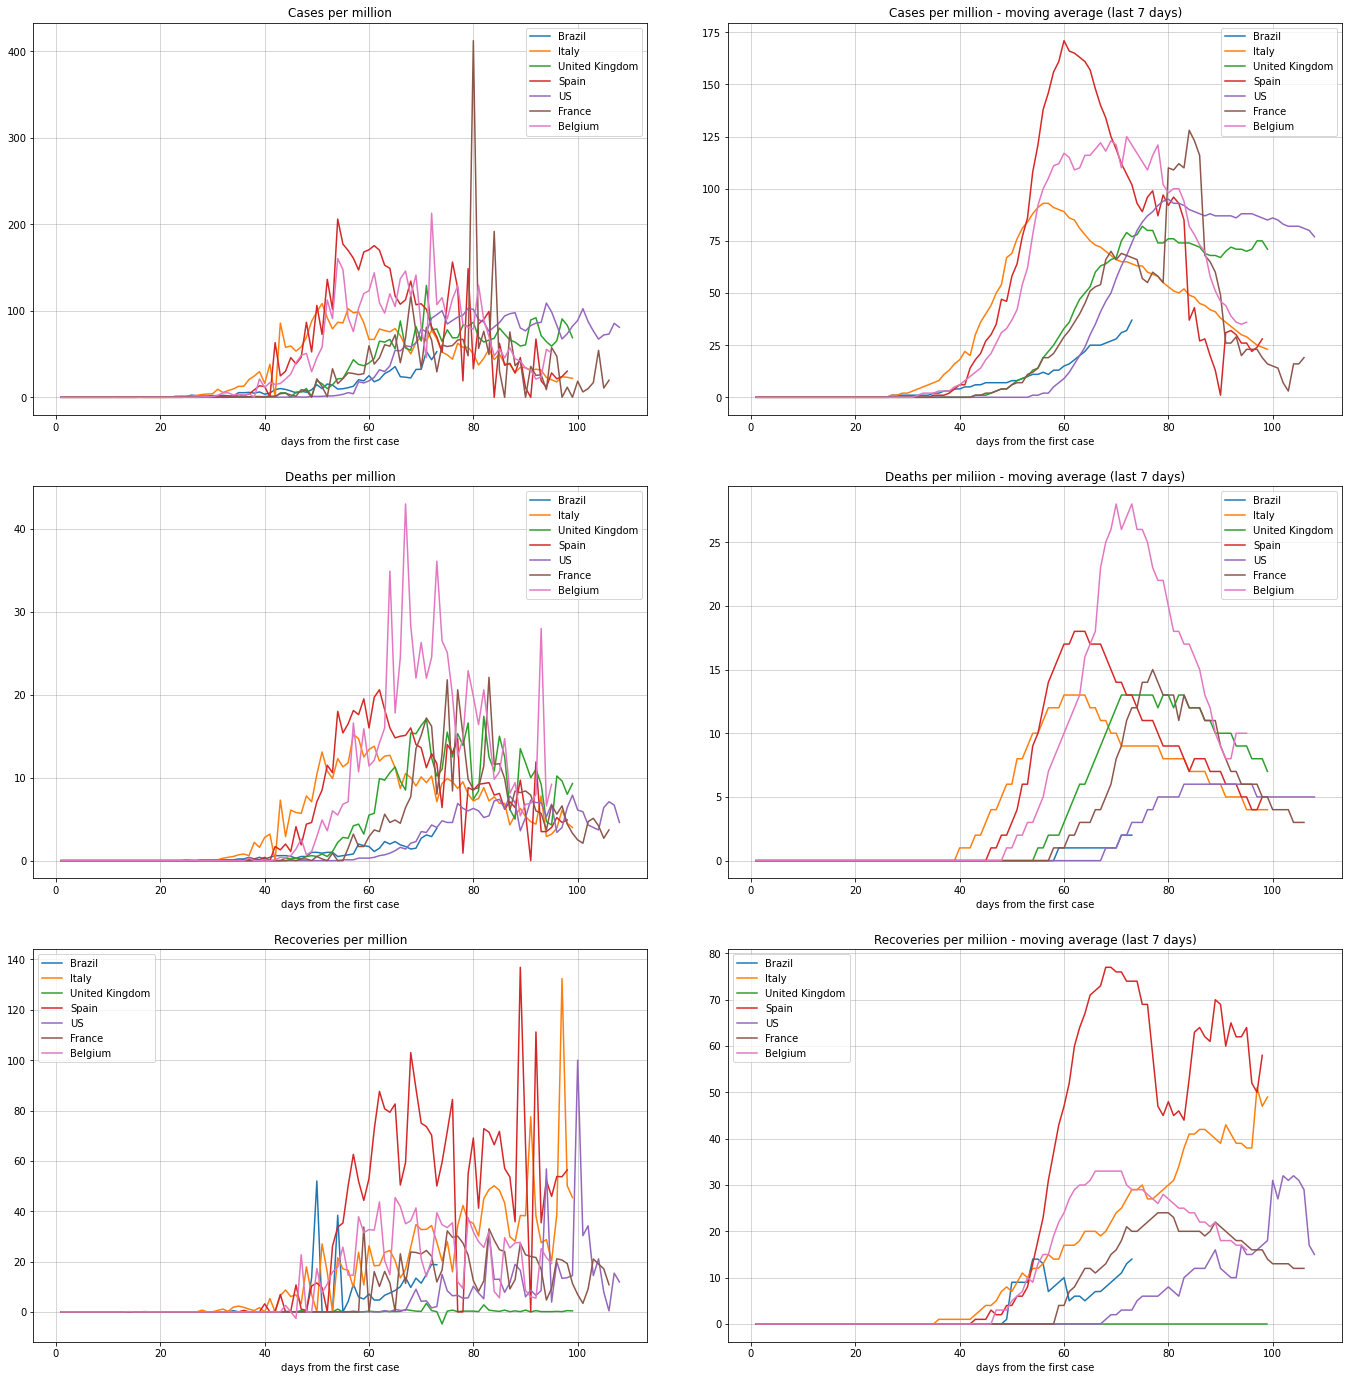

In [8]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)

ax1.set_title("Cases per million")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cases per million - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

ax3.set_title("Deaths per million")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("Deaths per miliion - moving average (last 7 days)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

ax5.set_title("Recoveries per million")
ax5.set_xlabel("days from the first case")
ax5.grid(color='gray', alpha = 0.4)

ax6.set_title("Recoveries per miliion - moving average (last 7 days)")
ax6.set_xlabel("days from the first case")
ax6.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    ax1.plot(df[df['country'] == country].day, df[df['country'] == country].cases_million, label = country)
    ax2.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_cases_million, label = country)
    ax3.plot(df[df['country'] == country].day, df[df['country'] == country].deaths_million, label = country)
    ax4.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_deaths_million, label = country)
    ax5.plot(df[df['country'] == country].day, df[df['country'] == country].recoveries_million, label = country)
    ax6.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_recoveries_million, label = country)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.savefig('../analysis/world_cases_deaths_million.png')

#### Active cases, world overview, % recoveries and mortality

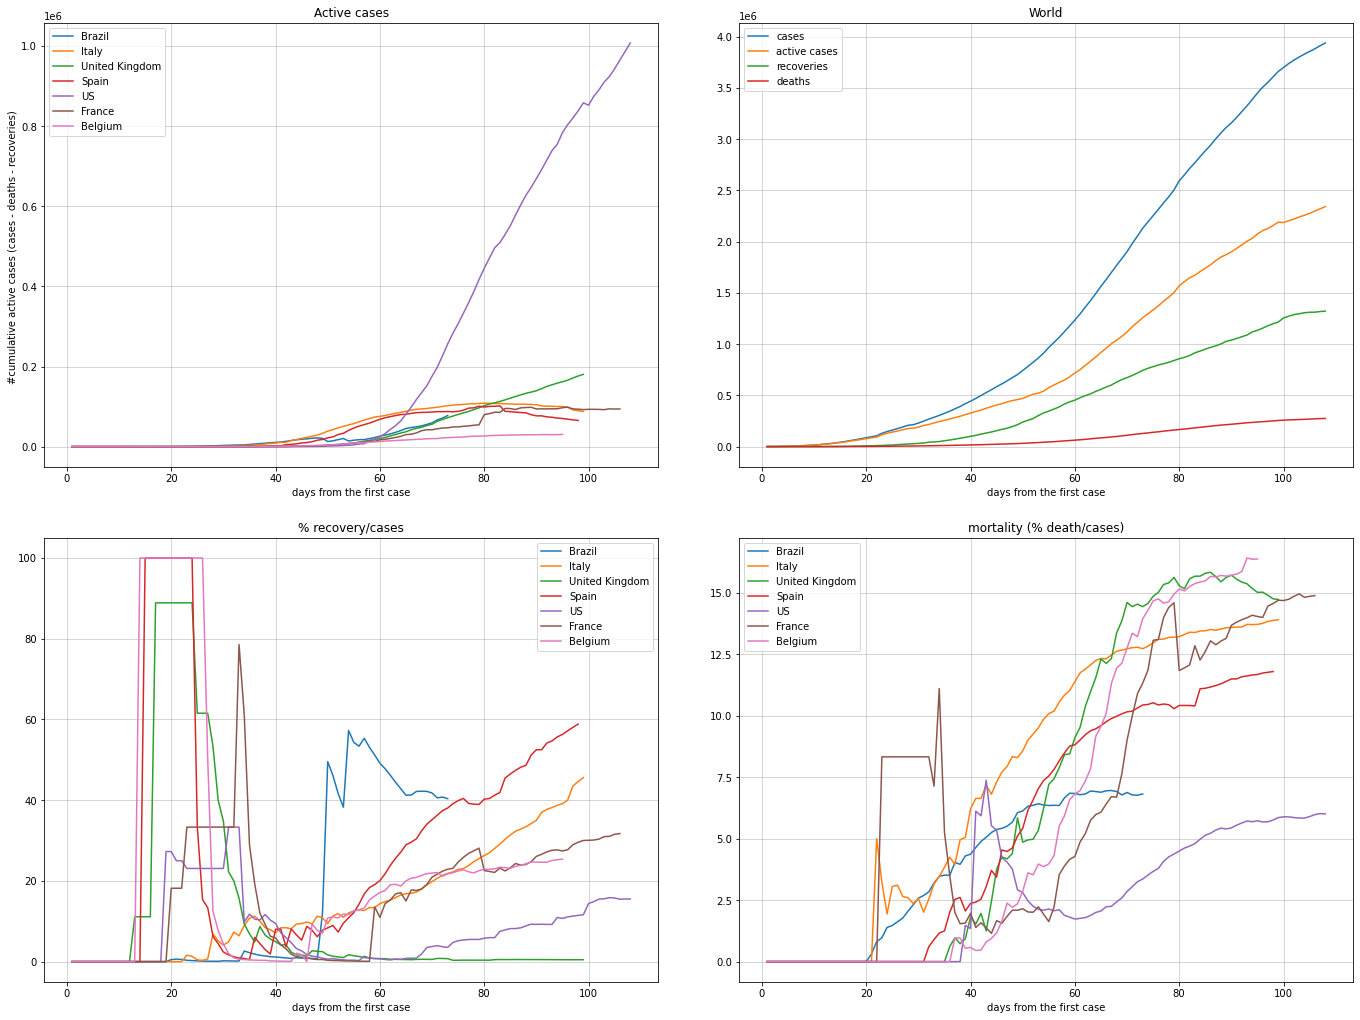

In [9]:
fig, ((ax1, ax2), (ax3, ax4),) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax3.set_title("% recovery/cases")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("mortality (% death/cases)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

ax1.set_title("Active cases")
ax1.set_xlabel("days from the first case")
ax1.set_ylabel("#cumulative active cases (cases - deaths - recoveries) ")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("World")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    ax3.plot(df[df['country'] == country].day, df[df['country'] == country].perc_recovery, label = country)
    ax4.plot(df[df['country'] == country].day, df[df['country'] == country].perc_death, label = country)
    ax1.plot(df[df['country'] == country].day, df[df['country'] == country].active_cases, label = country)

days = np.arange(1, len(df.groupby('day')['cases'].count())+1,1)
cases_world = df.groupby('day')['case_day'].sum().to_numpy().cumsum()
deaths_world = df.groupby('day')['death_day'].sum().to_numpy().cumsum()
recuperacoes_world = df.groupby('day')['recovery_day'].sum().to_numpy().cumsum()
cases_ativos_world = cases_world - deaths_world - recuperacoes_world

ax2.plot(days, cases_world, label = 'cases')
ax2.plot(days, cases_ativos_world, label = 'active cases')
ax2.plot(days, recuperacoes_world, label = 'recoveries')
ax2.plot(days, deaths_world, label = 'deaths')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
fig.savefig('../analysis/world_active_cases_percentages.png')

---------------------
### Brazil
#### Cases, deaths, recoveries

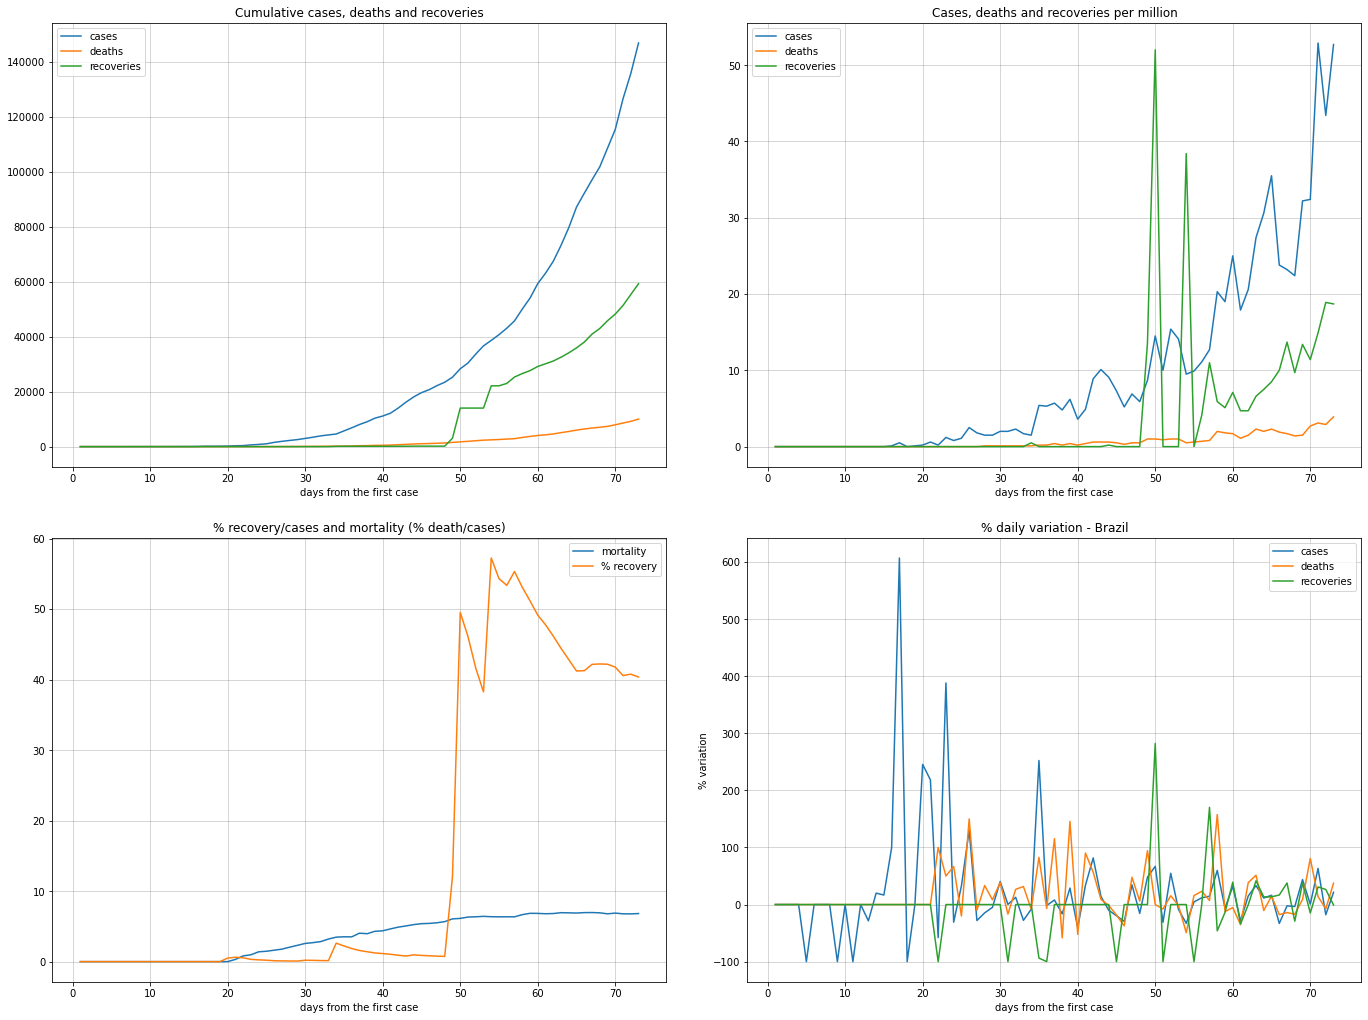

In [10]:
df_br = df[df['country'] == 'Brazil']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulative cases, deaths and recoveries")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)
ax1.plot(df_br.day, df_br.cases, label = 'cases')
ax1.plot(df_br.day, df_br.deaths, label = 'deaths')
ax1.plot(df_br.day, df_br.recoveries, label = 'recoveries')

ax2.set_title("Cases, deaths and recoveries per million")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)
ax2.plot(df_br.day, df_br.cases_million, label = 'cases')
ax2.plot(df_br.day, df_br.deaths_million, label = 'deaths')
ax2.plot(df_br.day, df_br.recoveries_million, label = 'recoveries')


ax3.set_title("% recovery/cases and mortality (% death/cases)")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df_br.day, df_br.perc_death, label = 'mortality')
ax3.plot(df_br.day, df_br.perc_recovery, label = '% recovery')

ax4.set_title("% daily variation - Brazil")
ax4.set_xlabel("days from the first case")
ax4.set_ylabel('% variation')
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df_br.day, df_br['%var_case_day'], label = 'cases')
ax4.plot(df_br.day, df_br['%var_death_day'], label = 'deaths')
ax4.plot(df_br.day, df_br['%var_recovery_day'], label = 'recoveries')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.savefig('../analysis/brazil_number_million_variation.png')

#### Moving averages (last 7 days)

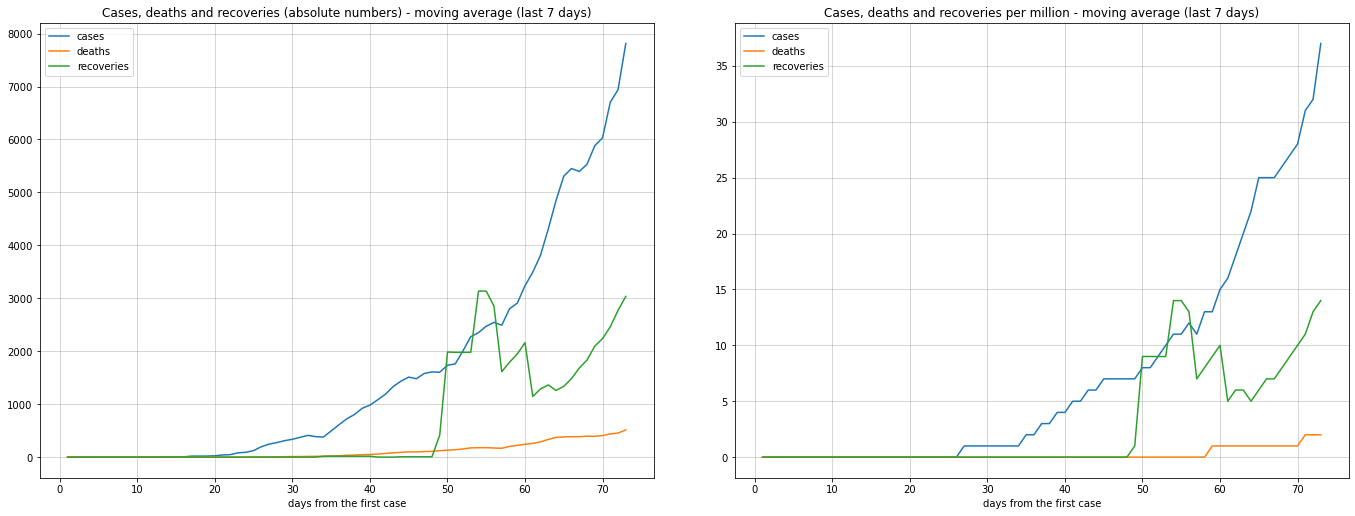

In [11]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax1.set_title("Cases, deaths and recoveries (absolute numbers) - moving average (last 7 days)")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)
ax1.plot(df_br.day, df_br.avg7_cases, label = 'cases')
ax1.plot(df_br.day, df_br.avg7_deaths, label = 'deaths')
ax1.plot(df_br.day, df_br.avg7_recoveries, label = 'recoveries')

ax2.set_title("Cases, deaths and recoveries per million - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)
ax2.plot(df_br.day, df_br.avg7_cases_million, label = 'cases')
ax2.plot(df_br.day, df_br.avg7_deaths_million, label = 'deaths')
ax2.plot(df_br.day, df_br.avg7_recoveries_million, label = 'recoveries')


# ax4.set_title("# daily quantity - Brazil (absolute numbers)")
# ax4.set_xlabel("days from the first case")
# ax4.set_ylabel('quantity')
# ax4.grid(color='gray', alpha = 0.4)
# ax4.plot(df_br.day, df_br.case_day, label = 'cases')
# ax4.plot(df_br.day, df_br.death_day, label = 'deaths')
# ax4.plot(df_br.day, df_br.recovery_day, label = 'recoveries')

ax1.legend()
ax2.legend()
# ax4.legend()

fig.savefig('../analysis/brazil_movingAvg.png')

### Generating the html file

In [12]:
f = open('../html/analysis.html', 'w')
f1 = open('../html/templates/analysis_01.html', 'r').read()
# f2 = open('../html/templates/analysis_02.html', 'r').read()
f3 = open('../html/templates/analysis_03.html', 'r').read()

readme = f1
readme += '<p>Estas análises são relativas aos dados da pandemia Covid19 no pelo mundoaté a data de <strong>' + today.strftime("%d/%m/%Y") + '</strong>.</p>'
readme += '<p style="font-size:14px"><i>Estas informações são para uso próprio e não devem ser utilizadas para direcionamentos médicos e/ou políticas públicas.</i></p>'

readme += '<p>Para não prejudicar a visualização dos dados, selecionei os seguintes países mais o Brasil para serem comparados entre si: ' + str(', '.join(monitoredCountries)).title() + '</p>'
readme += '<br></div></div>'
# readme += f2
readme += '        <div class="container">'
readme += '          <h3>Top ' + str(qtdeMonitored) + ' países mais mortais + Brasil</h3>'
readme += '          <p>O ranking é feito a partir da média móvel de 7 dias da quantidade de morte por milhão de população de cada país.</p>'
readme += df_top_deaths.to_html(classes='table', decimal=',', justify='justify')
readme += '        </div>'
readme += '        <br>'
readme += '        <div class="container">'
readme += '          <h3>Top ' + str(qtdeMonitored) + ' países mais transmissíveis + Brasil</h3>'
readme += '          <p>O ranking é feito a partir da média móvel de 7 dias de casos acumulados de cada país.</p>'
readme += df_top_cases.to_html(classes='table', decimal=',', justify='justify')
readme += f3

f.write(readme)
f.close()

###########################################

f = open('../html/analysis_EN.html', 'w')
f1 = open('../html/templates/analysis_EN_01.html', 'r').read()
# f2 = open('../html/templates/analysis_EN_02.html', 'r').read()
f3 = open('../html/templates/analysis_EN_03.html', 'r').read()

readme = f1
readme += '<p>These analysis are related to the Covid19 pandemic data up to <strong>' + today.strftime("%m/%d/%Y") + '</strong>.</p>'
readme += '<p style="font-size:14px"><i>This information is for own use only and shall NOT be used for medical and public policy guidances.</i></p>'
readme += '<p>To permit a better vizualization, I selected the follow countryies plus Brazil to be compared with each other: ' + str(', '.join(monitoredCountries)).title() + '</p>'
readme += '<br></div></div>'
# readme += f2
readme += '        <div class="container">'
readme += '          <h3>Top ' + str(qtdeMonitored) + ' deadliest countries + Brazil</h3>'
readme += '          <p>This ranking is done from the moving avarege of the last 7 days over the deaths per million of population of each country.</p>'
readme += df_top_deaths.to_html(classes='table', decimal=',', justify='justify')
readme += '        </div>'
readme += '        <br>'
readme += '        <div class="container">'
readme += '          <h3>Top ' + str(qtdeMonitored) + ' most transmissible countries + Brazil</h3>'
readme += '          <p>This ranking is done from the moving avarege of the last 7 days over the cumulative cases of each country.</p>'
readme += df_top_cases.to_html(classes='table', decimal=',', justify='justify')
readme += '        </div>'
readme += '        <br>'
readme += f3

f.write(readme)
f.close()
print('World analysis done!')

World analysis done!


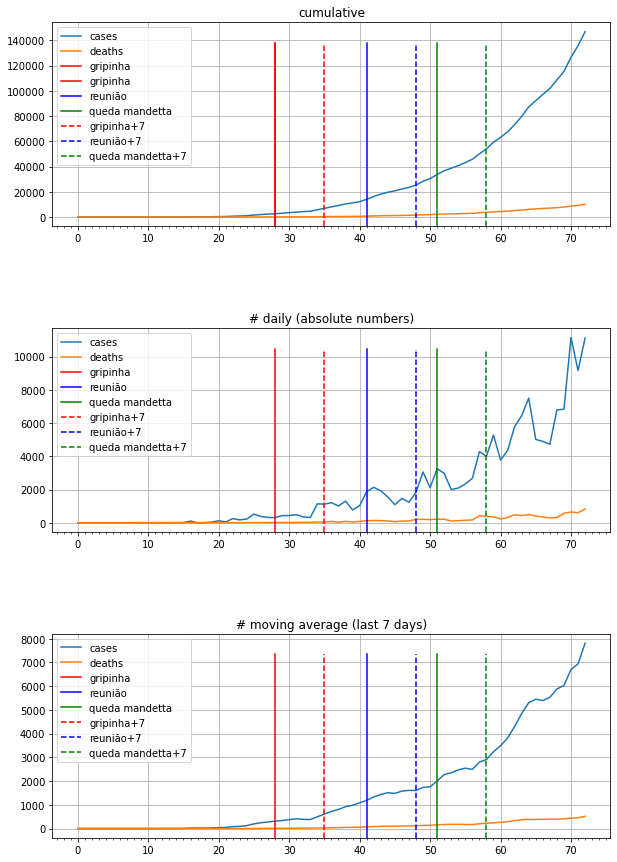

In [13]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

df_br = df[df['country']=='Brazil']

df_br.reset_index(0, inplace=True)

x = df_br.index
gripinha = df_br.loc[df_br.date == '2020-03-24'].index[0]+1
reuniao = df_br.loc[df_br.date == '2020-04-06'].index[0]+1
demissao = df_br.loc[df_br.date == '2020-04-16'].index[0]+1

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,15))
# fig.suptitle('Predicted for ' + df_br.country[0] + ' on ' + today + ' day('+ str(corte) +') ' + ' for the next ' + str(daysToPredict) + ' days')
fig.subplots_adjust(hspace = 0.5)
ax1.set_title('cumulative')
ax1.plot(x, df_br['cases'], label = 'cases')#, linewidths = 0.01)
ax1.plot(x, df_br['deaths'], label = 'deaths')
ax1.grid()
ax1.axvline(x=gripinha, ymin=0, ymax=0.9, color = 'red', label = 'gripinha')
ax1.axvline(x=gripinha, ymin=0, ymax=0.9, color = 'red', label = 'gripinha')
ax1.axvline(x=reuniao, ymin=0, ymax=0.9, color = 'blue', label = 'reunião')
ax1.axvline(x=demissao, ymin=0, ymax=0.9, color = 'green', label = 'queda mandetta')
ax1.axvline(x=gripinha+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'gripinha+7')
ax1.axvline(x=reuniao+7, ymin=0, ymax=0.9, color = 'blue', linestyle = '--', label = 'reunião+7')
ax1.axvline(x=demissao+7, ymin=0, ymax=0.9, color = 'green', linestyle = '--', label = 'queda mandetta+7')
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend()

ax2.set_title('# daily (absolute numbers)')
ax2.plot(x, df_br['case_day'], label = 'cases')
ax2.plot(x, df_br['death_day'], label = 'deaths')
ax2.grid()
ax2.axvline(x=gripinha, ymin=0, ymax=0.9, color = 'red', label = 'gripinha')
ax2.axvline(x=reuniao, ymin=0, ymax=0.9, color = 'blue', label = 'reunião')
ax2.axvline(x=demissao, ymin=0, ymax=0.9, color = 'green', label = 'queda mandetta')
ax2.axvline(x=gripinha+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'gripinha+7')
ax2.axvline(x=reuniao+7, ymin=0, ymax=0.9, color = 'blue', linestyle = '--', label = 'reunião+7')
ax2.axvline(x=demissao+7, ymin=0, ymax=0.9, color = 'green', linestyle = '--', label = 'queda mandetta+7')
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.legend()

avg7_cases_million = df_br['case_day'].rolling(window=7).mean().replace([np.inf, -np.inf], 0).replace([np.nan], 0).astype('int')
avg7_death_million = df_br['death_day'].rolling(window=7).mean().replace([np.inf, -np.inf], 0).replace([np.nan], 0).astype('int')

ax3.set_title('# moving average (last 7 days)')
ax3.plot(x, avg7_cases_million, label = 'cases')
ax3.plot(x, avg7_death_million, label = 'deaths')
ax3.grid()

ax3.axvline(x=gripinha, ymin=0, ymax=0.9, color = 'red', label = 'gripinha')
ax3.axvline(x=reuniao, ymin=0, ymax=0.9, color = 'blue', label = 'reunião')
ax3.axvline(x=demissao, ymin=0, ymax=0.9, color = 'green', label = 'queda mandetta')
ax3.axvline(x=gripinha+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'gripinha+7')
ax3.axvline(x=reuniao+7, ymin=0, ymax=0.9, color = 'blue', linestyle = '--', label = 'reunião+7')
ax3.axvline(x=demissao+7, ymin=0, ymax=0.9, color = 'green', linestyle = '--', label = 'queda mandetta+7')
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.legend()

# plt.savefig('../predictions/brazil_predictions.png')